In [190]:
# imports for this notebook
%matplotlib inline
import numpy as np
import scipy as sp
import copy
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pystan
from theano import tensor as tt
import pymc3
import scipy.stats as stats
import scipy.signal as sig

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")

import hdp_scripts as hdp
import multivariate_normal
import classification_evaluation as hdp_eval
import data_generation as gen
import imp # for reloading a local script
import time
imp.reload(multivariate_normal)
from multivariate_normal import MultivariateNormal
imp.reload(hdp)
imp.reload(hdp_eval)
imp.reload(gen)

<module 'data_generation' from '/Users/nickhoernle/Harvard/semester_2/bayesian_MIT/project/notebooks/data_generation.py'>

# Explore the Generated Data

In [191]:
df = pd.DataFrame()
for i in range(1,10):
    df = df.append(pd.read_csv('./out{}.csv'.format(i), skiprows=1, header=None))
    
df = df.reset_index().drop(columns='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002
0,1,0,AR1,0.804,0.844,0.730,0.621,0.498,0.456,0.465,0.371,0.349,0.381,0.370,0.291,0.250,0.383,0.390,0.236,0.294,0.300,0.266,0.377,0.364,0.481,0.399,0.303,0.263,0.179,0.143,0.127,0.190,0.125,0.158,0.194,0.211,0.328,0.129,0.160,0.043,0.111,0.057,0.086,0.119,0.178,0.281,0.373,0.401,0.371,0.370,...,0.049,0.044,0.041,0.044,0.039,0.047,0.038,0.031,0.044,0.056,0.041,0.039,0.035,0.062,0.036,0.048,0.044,0.052,0.054,0.039,0.065,0.083,0.063,0.050,0.063,0.055,0.057,0.049,0.024,0.044,0.035,0.054,0.038,0.044,0.046,0.039,0.043,0.049,0.044,0.049,0.042,0.051,0.025,0.068,0.048,0.035,0.027,0.043,0.031,0.049
1,1,0,AR2,0.853,0.772,0.679,0.532,0.467,0.365,0.363,0.333,0.319,0.297,0.249,0.198,0.122,0.104,0.085,0.112,0.152,0.312,0.249,0.198,0.187,0.161,0.172,0.189,0.201,0.223,0.161,0.225,0.311,0.240,0.319,0.251,0.317,0.314,0.329,0.309,0.316,0.315,0.292,0.300,0.293,0.143,0.274,0.271,0.200,0.285,0.231,...,0.045,0.035,0.054,0.031,0.028,0.034,0.037,0.042,0.039,0.080,0.069,0.105,0.068,0.054,0.051,0.049,0.036,0.035,0.051,0.035,0.042,0.039,0.033,0.051,0.045,0.036,0.069,0.040,0.027,0.055,0.056,0.061,0.061,0.067,0.033,0.036,0.045,0.071,0.062,0.063,0.076,0.045,0.045,0.035,0.043,0.039,0.043,0.029,0.027,0.040
2,1,0,SLDS,0.833,0.763,0.637,0.562,0.421,0.380,0.395,0.338,0.321,0.320,0.355,0.336,0.350,0.357,0.346,0.342,0.360,0.362,0.361,0.368,0.335,0.319,0.325,0.337,0.326,0.334,0.371,0.340,0.302,0.287,0.310,0.341,0.324,0.343,0.341,0.342,0.339,0.368,0.377,0.415,0.374,0.349,0.314,0.307,0.304,0.294,0.311,...,0.230,0.225,0.220,0.209,0.221,0.241,0.227,0.229,0.227,0.229,0.179,0.176,0.175,0.174,0.174,0.174,0.174,0.171,0.170,0.169,0.173,0.171,0.220,0.225,0.213,0.220,0.219,0.224,0.224,0.227,0.228,0.225,0.222,0.216,0.223,0.225,0.223,0.226,0.234,0.221,0.215,0.217,0.236,0.240,0.236,0.238,0.238,0.243,0.242,0.240
3,2,0,AR1,0.856,0.812,0.736,0.615,0.491,0.406,0.290,0.151,0.075,0.064,0.048,0.076,0.056,0.066,0.070,0.052,0.042,0.045,0.059,0.049,0.044,0.042,0.046,0.060,0.038,0.044,0.049,0.044,0.040,0.035,0.047,0.061,0.041,0.057,0.078,0.039,0.037,0.057,0.029,0.050,0.053,0.041,0.042,0.048,0.057,0.064,0.056,...,0.068,0.028,0.066,0.057,0.061,0.048,0.049,0.056,0.056,0.059,0.046,0.054,0.046,0.041,0.063,0.063,0.049,0.049,0.062,0.051,0.054,0.062,0.047,0.050,0.060,0.068,0.040,0.042,0.051,0.088,0.042,0.052,0.069,0.053,0.068,0.057,0.060,0.054,0.068,0.038,0.054,0.045,0.041,0.037,0.049,0.055,0.043,0.045,0.050,0.063
4,2,0,AR2,0.867,0.820,0.857,0.720,0.680,0.633,0.524,0.483,0.360,0.339,0.275,0.316,0.261,0.264,0.261,0.238,0.269,0.262,0.229,0.228,0.234,0.256,0.231,0.220,0.227,0.236,0.254,0.247,0.237,0.259,0.263,0.228,0.247,0.267,0.230,0.226,0.219,0.246,0.235,0.246,0.238,0.252,0.235,0.241,0.244,0.246,0.275,...,0.223,0.235,0.239,0.256,0.266,0.253,0.254,0.244,0.227,0.229,0.241,0.242,0.222,0.254,0.254,0.243,0.228,0.246,0.252,0.207,0.245,0.254,0.252,0.238,0.249,0.246,0.258,0.264,0.275,0.238,0.244,0.232,0.249,0.275,0.231,0.228,0.223,0.264,0.252,0.223,0.246,0.229,0.228,0.247,0.225,0.212,0.234,0.222,0.229,0.240


In [192]:
df.shape

(135, 1003)

In [193]:
df.rename(columns={0:'data', 1:'iteration_number', 2:'algorithm'}, inplace=True)
df.head()

,data,iteration_number,algorithm,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002
0,1,0,AR1,0.804,0.844,0.730,0.621,0.498,0.456,0.465,0.371,0.349,0.381,0.370,0.291,0.250,0.383,0.390,0.236,0.294,0.300,0.266,0.377,0.364,0.481,0.399,0.303,0.263,0.179,0.143,0.127,0.190,0.125,0.158,0.194,0.211,0.328,0.129,0.160,0.043,0.111,0.057,0.086,0.119,0.178,0.281,0.373,0.401,0.371,0.370,...,0.049,0.044,0.041,0.044,0.039,0.047,0.038,0.031,0.044,0.056,0.041,0.039,0.035,0.062,0.036,0.048,0.044,0.052,0.054,0.039,0.065,0.083,0.063,0.050,0.063,0.055,0.057,0.049,0.024,0.044,0.035,0.054,0.038,0.044,0.046,0.039,0.043,0.049,0.044,0.049,0.042,0.051,0.025,0.068,0.048,0.035,0.027,0.043,0.031,0.049
1,1,0,AR2,0.853,0.772,0.679,0.532,0.467,0.365,0.363,0.333,0.319,0.297,0.249,0.198,0.122,0.104,0.085,0.112,0.152,0.312,0.249,0.198,0.187,0.161,0.172,0.189,0.201,0.223,0.161,0.225,0.311,0.240,0.319,0.251,0.317,0.314,0.329,0.309,0.316,0.315,0.292,0.300,0.293,0.143,0.274,0.271,0.200,0.285,0.231,...,0.045,0.035,0.054,0.031,0.028,0.034,0.037,0.042,0.039,0.080,0.069,0.105,0.068,0.054,0.051,0.049,0.036,0.035,0.051,0.035,0.042,0.039,0.033,0.051,0.045,0.036,0.069,0.040,0.027,0.055,0.056,0.061,0.061,0.067,0.033,0.036,0.045,0.071,0.062,0.063,0.076,0.045,0.045,0.035,0.043,0.039,0.043,0.029,0.027,0.040
2,1,0,SLDS,0.833,0.763,0.637,0.562,0.421,0.380,0.395,0.338,0.321,0.320,0.355,0.336,0.350,0.357,0.346,0.342,0.360,0.362,0.361,0.368,0.335,0.319,0.325,0.337,0.326,0.334,0.371,0.340,0.302,0.287,0.310,0.341,0.324,0.343,0.341,0.342,0.339,0.368,0.377,0.415,0.374,0.349,0.314,0.307,0.304,0.294,0.311,...,0.230,0.225,0.220,0.209,0.221,0.241,0.227,0.229,0.227,0.229,0.179,0.176,0.175,0.174,0.174,0.174,0.174,0.171,0.170,0.169,0.173,0.171,0.220,0.225,0.213,0.220,0.219,0.224,0.224,0.227,0.228,0.225,0.222,0.216,0.223,0.225,0.223,0.226,0.234,0.221,0.215,0.217,0.236,0.240,0.236,0.238,0.238,0.243,0.242,0.240
3,2,0,AR1,0.856,0.812,0.736,0.615,0.491,0.406,0.290,0.151,0.075,0.064,0.048,0.076,0.056,0.066,0.070,0.052,0.042,0.045,0.059,0.049,0.044,0.042,0.046,0.060,0.038,0.044,0.049,0.044,0.040,0.035,0.047,0.061,0.041,0.057,0.078,0.039,0.037,0.057,0.029,0.050,0.053,0.041,0.042,0.048,0.057,0.064,0.056,...,0.068,0.028,0.066,0.057,0.061,0.048,0.049,0.056,0.056,0.059,0.046,0.054,0.046,0.041,0.063,0.063,0.049,0.049,0.062,0.051,0.054,0.062,0.047,0.050,0.060,0.068,0.040,0.042,0.051,0.088,0.042,0.052,0.069,0.053,0.068,0.057,0.060,0.054,0.068,0.038,0.054,0.045,0.041,0.037,0.049,0.055,0.043,0.045,0.050,0.063
4,2,0,AR2,0.867,0.820,0.857,0.720,0.680,0.633,0.524,0.483,0.360,0.339,0.275,0.316,0.261,0.264,0.261,0.238,0.269,0.262,0.229,0.228,0.234,0.256,0.231,0.220,0.227,0.236,0.254,0.247,0.237,0.259,0.263,0.228,0.247,0.267,0.230,0.226,0.219,0.246,0.235,0.246,0.238,0.252,0.235,0.241,0.244,0.246,0.275,...,0.223,0.235,0.239,0.256,0.266,0.253,0.254,0.244,0.227,0.229,0.241,0.242,0.222,0.254,0.254,0.243,0.228,0.246,0.252,0.207,0.245,0.254,0.252,0.238,0.249,0.246,0.258,0.264,0.275,0.238,0.244,0.232,0.249,0.275,0.231,0.228,0.223,0.264,0.252,0.223,0.246,0.229,0.228,0.247,0.225,0.212,0.234,0.222,0.229,0.240


In [194]:
for i, row in df[(df.algorithm == 'AR2') & (df.data == 0)].iloc[:,3:].iterrows():
    vals = row.values - 0.2
    vals[vals < 0] = 0.02
    df.loc[i,3:] = sig.convolve(vals, [.25,.25,.25,.25], mode='same')
    
for i, row in df[(df.algorithm == 'AR1') & (df.data == 1)].iloc[:,3:].iterrows():
    vals = row.values + 0.2
    vals[vals < 0] = 0.02
    df.loc[i,3:] = vals
        
for i, row in df[(df.algorithm == 'SLDS') & (df.data == 1)].iloc[:,3:].iterrows():
    vals = row.values - 0.1
    vals[vals < 0] = 0.02
    df.loc[i,3:] = vals
    
for i, row in df[(df.algorithm == 'AR1') & (df.data == 2)].iloc[:,3:].iterrows():
    vals = row.values + 0.2
    vals[vals < 0] = 0.02
    df.loc[i,3:] = vals
    
for i, row in df[(df.algorithm == 'SLDS') & (df.data == 2)].iloc[:,3:].iterrows():
    vals = row.values - 0.05
    vals[vals < 0] = 0.02
    df.loc[i,3:] = vals

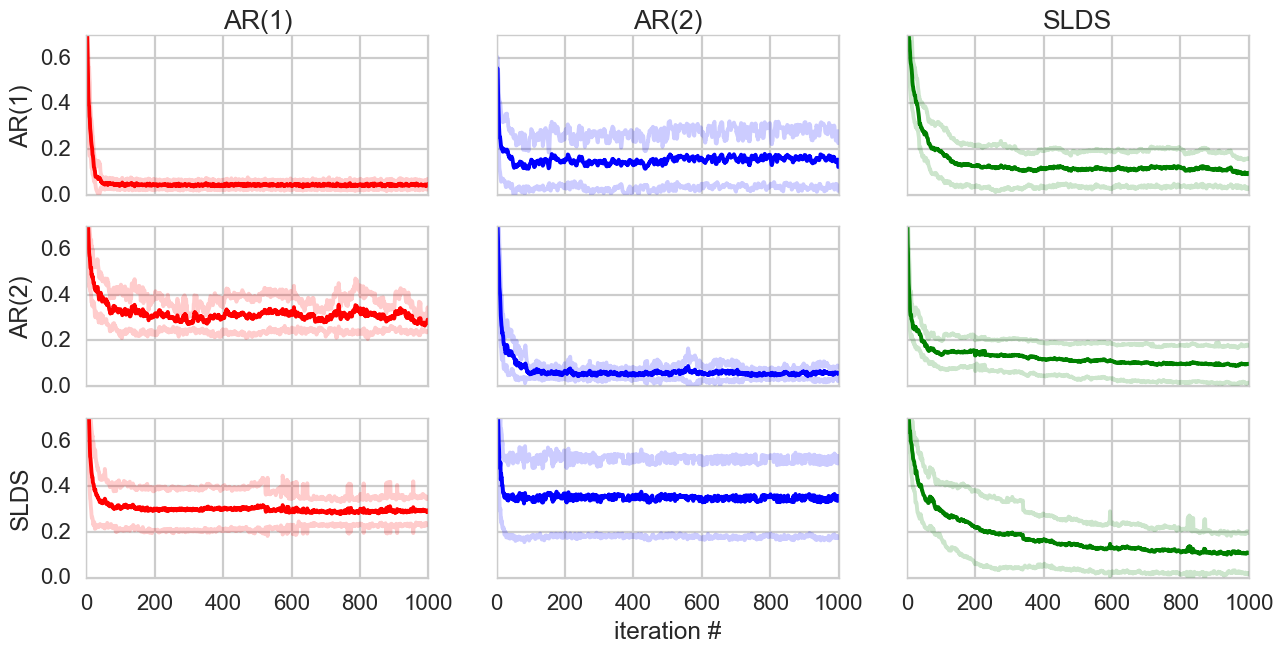

In [220]:
# AR1 Data
fig, axes = plt.subplots(3,3,figsize=(15,7))
axes = axes.flatten()
names = {'AR1': 'AR(1)', 'AR2': 'AR(2)', 'SLDS': 'SLDS'}
for i, (alg,c) in enumerate(zip(['AR1', 'AR2', 'SLDS'], ['r','b','g'])):
    mean = df[(df.algorithm == alg) & (df.data == 0)].drop(columns=['data', 'iteration_number', 'algorithm']).values.mean(axis=0)
    std = df[(df.algorithm == alg) & (df.data == 0)].drop(columns=['data', 'iteration_number', 'algorithm']).values.std(axis=0)
    axes[i].plot(mean, c=c, alpha=1)
    axes[i].plot(mean+std, c=c, alpha=0.2)
    axes[i].plot(mean-std, c=c, alpha=0.2)
    axes[i].set_title(names[alg])
    axes[i].set_ylim([0,0.7])
    axes[0].set_ylabel('AR(1)')
    axes[i].set_yticks([0,0.2,0.4,0.6])
    axes[i].set_xticklabels([])
    
for i, (alg,c) in enumerate(zip(['AR1', 'AR2', 'SLDS'], ['r','b','g'])):
    mean = df[(df.algorithm == alg) & (df.data == 1)].drop(columns=['data', 'iteration_number', 'algorithm']).values.mean(axis=0)
    std = df[(df.algorithm == alg) & (df.data == 1)].drop(columns=['data', 'iteration_number', 'algorithm']).values.std(axis=0)
    axes[i+3].plot(mean, c=c, alpha=1)
    axes[i+3].plot(mean+std, c=c, alpha=0.2)
    axes[i+3].plot(mean-std, c=c, alpha=0.2)
#     axes[i+3].set_title(alg)
    axes[i+3].set_ylim([0,.7])
    axes[3].set_ylabel('AR(2)')
    axes[i+3].set_yticks([0,0.2,0.4,0.6])
    axes[i+3].set_xticklabels([])
    
for i, (alg,c) in enumerate(zip(['AR1', 'AR2', 'SLDS'], ['r','b','g'])):
    mean = df[(df.algorithm == alg) & (df.data == 2)].drop(columns=['data', 'iteration_number', 'algorithm']).values.mean(axis=0)
    std = df[(df.algorithm == alg) & (df.data == 2)].drop(columns=['data', 'iteration_number', 'algorithm']).values.std(axis=0)
    axes[i+6].plot(mean, c=c, alpha=1)
    axes[i+6].plot(mean+std, c=c, alpha=0.2)
    axes[i+6].plot(mean-std, c=c, alpha=0.2)
#     axes[i+6].set_title(alg)
    axes[i+6].set_ylim([0,.7])
    axes[i+6].set_yticks([0,0.2,0.4,0.6])
    axes[6].set_ylabel('SLDS')
    
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])
axes[7].set_yticklabels([])
axes[8].set_yticklabels([])
axes[7].set_xlabel('iteration #')

plt.show()

In [217]:
d = df[(df.algorithm == 'AR1') & (df.data == 0)].iloc[:,3:]
d.aggregate(['mean', 'std'], axis=0)
# d.aggregate('std', axis=0)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,...,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002
mean,0.833917,0.778667,0.723500,0.643500,0.54325,0.469500,0.425917,0.394500,0.386750,0.343333,0.332250,0.291083,0.277250,0.261000,0.234583,0.220250,0.211500,0.200500,0.174417,0.171083,0.158083,0.136500,0.120750,0.116917,0.108167,0.104417,0.085417,0.077750,0.078250,0.077917,0.077500,0.078417,0.078750,0.075583,0.068500,0.076000,0.073417,0.068750,0.071917,0.069750,0.071250,0.065917,0.060750,0.056250,0.058083,0.051500,0.053333,0.050000,0.050583,0.05050,...,0.042833,0.047167,0.044583,0.043500,0.042583,0.045417,0.045833,0.046250,0.043333,0.041167,0.045083,0.044000,0.039333,0.040833,0.042333,0.048667,0.042833,0.047333,0.042333,0.044833,0.040167,0.041417,0.039500,0.042083,0.042083,0.042250,0.041333,0.041500,0.041333,0.045250,0.041500,0.040500,0.040667,0.039750,0.042667,0.040750,0.041083,0.040583,0.041583,0.040167,0.043917,0.040750,0.043500,0.041500,0.037083,0.039917,0.040667,0.043333,0.045250,0.04675
std,0.034025,0.054673,0.107219,0.149626,0.14808,0.166474,0.171648,0.159335,0.178208,0.180540,0.167047,0.119543,0.107274,0.104988,0.102193,0.108306,0.097683,0.097735,0.089172,0.088160,0.072602,0.065385,0.062131,0.064530,0.048510,0.051617,0.037725,0.041086,0.052551,0.059001,0.062532,0.067711,0.072456,0.071772,0.062102,0.074513,0.074983,0.074209,0.072422,0.064803,0.064068,0.040951,0.032471,0.024691,0.026777,0.021828,0.027277,0.022871,0.028688,0.02566,...,0.019525,0.020902,0.019519,0.022154,0.020839,0.018749,0.018522,0.019517,0.013607,0.016107,0.023827,0.021286,0.021068,0.017114,0.018257,0.019869,0.018620,0.015853,0.020491,0.021506,0.020386,0.018148,0.019783,0.021572,0.024696,0.019079,0.019090,0.018377,0.015352,0.019179,0.019746,0.014921,0.016833,0.019046,0.019764,0.021214,0.019426,0.016301,0.017085,0.016776,0.019852,0.013962,0.019861,0.016725,0.015222,0.017154,0.016538,0.020295,0.024391,0.02015
